In [1]:
%matplotlib inline
import numpy as np
import pylab as py
from scipy import misc, fftpack
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

### Homework 3.4 - Testing out filters

We are testing out the following filters:

- Low pass filter
- High pass filter
- Band filter
- Guassian blur filter

Pick an image of your choice and apply those filters on it.

**You must show all the steps clearly. Write your explanation in the markdown boxes.**

Read the image.

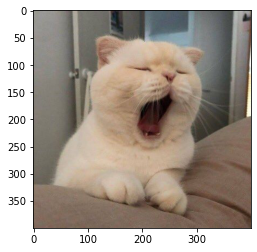

In [2]:
image = mpimg.imread('testing_out_filters.jpg')
py.imshow(image)
py.show()

Convert the image to gray scale.

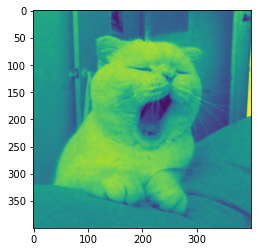

In [3]:
grayim = image[:,:,0]
py.imshow(grayim)
py.show()

Turn the image into a fourier frequency space with normalization. In order to plot, we need to get real numbers from the complex frequency, the result of the fourier transform.

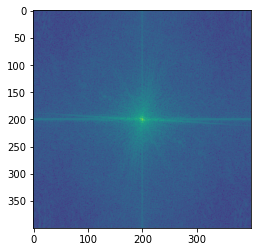

In [4]:
norm = np.sqrt(grayim.shape[0]*grayim.shape[1])
D1_im = fftpack.fft2(grayim)/norm
D2_im = fftpack.fftshift(D1_im)
abs_image = np.abs(D2_im)**0.05
py.imshow(abs_image)
py.show()

- n: Dimension
- I: Array of 1 to n
- x and y: 0-centered array
- M: Mask depending on the filter. Note that anything close to the center is low frequency.

- D1_mask = fftpack.fft2(M)/n: Fourier transform with normalization
- D2_mask = fftpack.ifft2(D1_mask)/n: Invert the fourier transform back

- f_filtered = D2_im * M: Applying the mask onto the image
- Apply Inverse Fourier Transform on f_filtered.
- Expand the result such that all values are between 0 and 255.
- Restore the shifting again with fftshift() function, otherwise the resulting image would be a blurred shifted image about the center.

Low pass filter

- Allow only low frequency at the center to pass.
- The image is slighlty blurred.

- M: A boolean map where satisfied the condition = 1, otherwise = 0

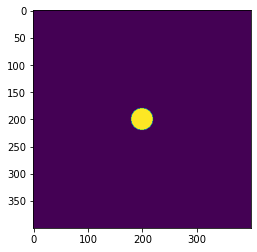

In [5]:
n = image.shape[0] + 1
I = np.arange(1, n)
x = I - n / 2
y = n / 2 - I
X = x[:, np.newaxis]
Y = y[np.newaxis, :]
R = 20
M = X**2 + Y**2 < R**2

D1_mask = fftpack.fft2(M)/n
D2_mask = fftpack.ifft2(D1_mask)/n
plt.imshow(np.abs(D2_mask))

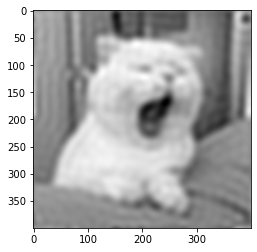

In [6]:
f_filtered = D2_im * M
f_filtered_shifted = np.fft.fftshift(f_filtered)
inv_img = np.fft.ifft2(f_filtered_shifted)
filtered_img = np.abs(inv_img)
filtered_img -= filtered_img.min()
filtered_img = filtered_img*255 / filtered_img.max()
filtered_img = filtered_img.astype(np.uint8)
plt.imshow(filtered_img, cmap='gray')

High pass filter

- Get all the high frequency of the image, such as the edges.

- M: A boolean map where satisfied the condition = 1, otherwise = 0

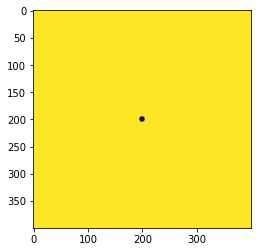

In [7]:
n = image.shape[0] + 1
I = np.arange(1, n)
x = I - n / 2
y = n / 2 - I
X = x[:, np.newaxis]
Y = y[np.newaxis, :]
R = 5
M = X**2 + Y**2 > R**2

D1_mask = fftpack.fft2(M)/n
D2_mask = fftpack.ifft2(D1_mask)/n
plt.imshow(np.abs(D2_mask))

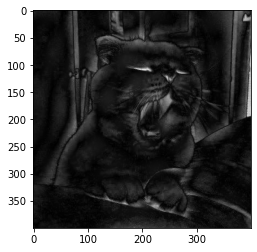

In [8]:
f_filtered = D2_im * M
f_filtered_shifted = np.fft.fftshift(f_filtered)
inv_img = np.fft.ifft2(f_filtered_shifted)
filtered_img = np.abs(inv_img)
filtered_img -= filtered_img.min()
filtered_img = filtered_img*255 / filtered_img.max()
filtered_img = filtered_img.astype(np.uint8)
plt.imshow(filtered_img, cmap='gray')

Band pass filter

- Create a ring.
- Remove the low and high frequencies to get the medium frequency.

- M: A boolean map where satisfied the condition = 1, otherwise = 0

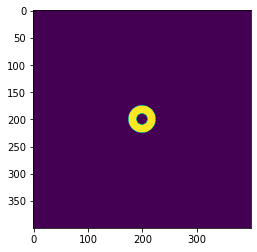

In [9]:
n = image.shape[0] + 1
I = np.arange(1, n)
x = I - n / 2
y = n / 2 - I
X = x[:, np.newaxis]
Y = y[np.newaxis, :]
R1 = 25
R2 = 10
M = (X**2 + Y**2 < R1**2) ^ (X**2 + Y**2 < R2**2)

D1_mask = fftpack.fft2(M)/n
D2_mask = fftpack.ifft2(D1_mask)/n
plt.imshow(np.abs(D2_mask))

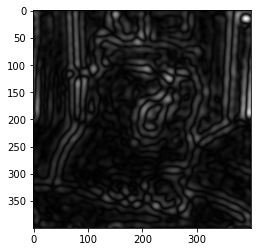

In [10]:
f_filtered = D2_im * M
f_filtered_shifted = np.fft.fftshift(f_filtered)
inv_img = np.fft.ifft2(f_filtered_shifted)
filtered_img = np.abs(inv_img)
filtered_img -= filtered_img.min()
filtered_img = filtered_img*255 / filtered_img.max()
filtered_img = filtered_img.astype(np.uint8)
plt.imshow(filtered_img, cmap='gray')

Gaussian blur filter

- Create a gaussian peak at the middle.
- The image is nicely blurred. Every pixel is blurred out in all directions.

$$
    G(x, y) = \frac{e^{- \frac{x^2+y^2}{2 \sigma^2}}}{2 \pi \sigma^2}
$$

- M: The returned value of function G()

In [11]:
def G(x, y, sigma):
    return np.exp(-(x**2+y**2)/(2*sigma**2))/(2*np.pi*sigma**2)

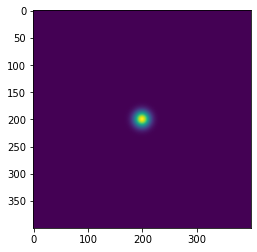

In [12]:
n = image.shape[0] + 1
I = np.arange(1, n)
x = I - n / 2
y = n / 2 - I
X = x[:, np.newaxis]
Y = y[np.newaxis, :]
M = G(X, Y, 10)

D1_mask = fftpack.fft2(M)/n
D2_mask = fftpack.ifft2(D1_mask)/n
plt.imshow(np.abs(D2_mask))

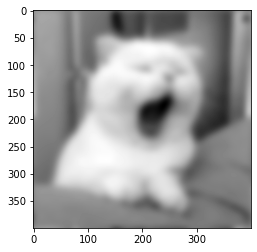

In [13]:
f_filtered = D2_im * M
f_filtered_shifted = np.fft.fftshift(f_filtered)
inv_img = np.fft.ifft2(f_filtered_shifted)
filtered_img = np.abs(inv_img)
filtered_img -= filtered_img.min()
filtered_img = filtered_img*255 / filtered_img.max()
filtered_img = filtered_img.astype(np.uint8)
plt.imshow(filtered_img, cmap='gray')